# Random Forest Classifier 

## Content   <a name="content"></a>

1. [Load data](#1)
2. [ML with all features. Algorithm selection by Cross-validation.](#2)
3. [Overfitting exploration.](#3)
4. [All features ML with the Random Forest Classifier estimator.](#4)
5. [Feature importance. Three methods comparison.](#5)
6. [Hyper-parameter tuning of the five-feature model](#6)
7. [Compariosn of the training and testing accuracy results of the five-feature model](#7)
8. [Confusion matrix and classification report of the five-feature model](#8)
9. [Printing the real and the predicted values](#9)
10. [ Neural Network tuned with the  hyperparameter optimization framework Optuna](#10)

In [1]:
# pip install pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn
# pip install xgboost
# pip install optuna

## Load data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df = pd.read_csv('data_classification_smote.csv', index_col=[0])

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (75306, 61)


,Solubility_at_pH_7_4,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,12.0,384.50,79.500,23.4,28,1,4,8,1,11.3330,11.3330,20.309576,20.107702,13.0551,13.8973,19.979052,20.013042,2.335609e-02,1.133098e-04,12.5917,14.2519,19.563223,19.543975,6.4871,8.2173,20.014048,20.202387,3.1129,4.7706,19.600111,19.783855,22.673852,20.026843,20.024086,20.010930,0.39,0.50,0.07,0.00,0.04,0.0,0.00,0.0,68.73,7.34,16.64,0.00,7.29,0.0,0.00,0.0,20.868090,20.815482,1.941037,1.734377,4.045006,2.987444,2.083941,1.722488,20.053,0
1,0.3,312.40,93.400,24.0,22,3,3,3,1,11.4219,11.4219,20.036188,19.858587,12.0149,12.0149,20.029342,19.879711,0.000000e+00,2.566705e-06,14.0364,16.0807,20.003361,19.847758,3.3504,6.0014,20.128765,20.235020,1.2993,2.7175,20.607959,20.748004,59.072272,20.388290,20.081949,20.097087,0.45,0.42,0.05,0.03,0.05,0.0,0.00,0.0,65.36,5.16,10.24,10.26,8.97,0.0,0.00,0.0,20.950645,20.950645,4.189470,2.679491,10.803048,5.917461,2.578619,2.208427,20.064,0
2,41.3,320.90,32.299,23.3,22,1,2,6,1,13.0841,14.1234,19.956240,20.096947,8.7935,8.7935,19.165175,19.311081,8.248105e-02,7.335008e-05,12.7621,14.6965,19.633092,19.814789,5.2922,7.0138,19.913408,19.980427,2.3956,4.2789,19.656162,19.828168,39.336534,20.031736,20.028942,20.029890,0.38,0.53,0.02,0.00,0.04,0.0,0.02,0.0,67.38,7.85,4.99,0.00,8.73,0.0,11.05,0.0,21.487929,21.606118,2.411492,2.095369,5.327308,3.434644,2.209133,1.639160,20.120,0
3,31.7,310.40,32.800,22.9,23,0,3,4,1,14.2920,14.2937,20.023506,20.052367,8.6987,8.6987,19.978641,20.085427,1.579800e-18,2.962286e-08,15.3836,17.5262,20.028423,20.107614,2.6526,4.4215,19.909881,20.058074,2.3323,3.8228,20.661202,20.353797,31.911905,20.058185,20.149885,20.073523,0.42,0.49,0.04,0.00,0.04,0.0,0.00,0.0,73.52,7.14,10.31,0.00,9.03,0.0,0.00,0.0,21.643004,21.643200,5.799442,3.963858,6.595892,4.584650,1.137332,1.156613,20.057,0
4,45.0,300.31,87.500,20.3,22,2,4,4,1,8.9789,9.5655,20.271036,20.266819,8.8915,8.8915,19.989060,20.257724,2.666619e-03,6.790035e-05,8.5180,10.3346,20.071139,19.806840,5.0592,7.5889,20.130079,20.119064,3.5879,4.8265,19.571327,19.683224,32.398046,20.443034,20.071181,20.109644,0.39,0.42,0.08,0.00,0.11,0.0,0.00,0.0,59.99,5.37,15.98,0.00,18.66,0.0,0.00,0.0,21.009830,21.075803,1.683665,1.361805,2.374091,2.141220,1.410073,1.572340,20.049,0


In [3]:
df.describe(include="all")

,Solubility_at_pH_7_4,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
count,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.0,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,7.530600e+04,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,7.530600e+04,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000,75306.000000
mean,25.343914,301.004328,77.006224,22.668912,20.954492,1.095756,4.046650,3.649059,1.0,9.798071,10.405539,20.026911,20.024991,8.336373,8.881807,19.950075,19.977231,6.807170e+00,0.041940,10.365401,12.392381,20.012603,20.015670,4.702346,6.717856,19.995537,19.998090,2.374893,4.127379,19.998296,19.996179,6.032492e+01,20.402379,20.615362,20.580650,0.413381,0.423230,0.061433,0.014943,0.075830,0.001019,0.004955,0.004619,61.025099,5.357140,11.797882,5.468731,12.739307,0.763972,1.859405,0.988208,21.402583,21.342283,2.458140,1.937962,144.491125,44.186035,63.258184,23.881027,20.057672,0.500000
std,17.752922,44.263798,28.555827,1.063746,3.293454,0.799579,1.466385,1.685029,0.0,2.758181,2.622584,0.277381,0.246108,2.777688,2.617258,0.339794,0.279368,4.720540e+01,0.264041,2.293435,2.237531,0.293803,0.242819,1.402614,1.328478,0.411930,0.271029,1.046220,1.225096,0.528889,0.348779,6.978784e+01,1.250524,7.539565,7.262224,0.042670,0.061061,0.037586,0.019108,0.037158,0.005814,0.013629,0.016367,8.867169,1.408176,6.805528,6.624366,5.704758,4.251734,4.852899,3.292727,0.821225,0.665288,1.019725,0.566453,1004.182967,464.851588,486.465441,268.722968,0.016639,0.500003
min,0.100000,87.080000,3.200000,14.000000,6.000000,0.000000,0.000000,0.000000,1.0,1.458400,2.605200,18.464763,18.966677,0.599700,1.950000,18.543130,18.816556,0.000000e+00,0.000000,2.145400,4.065400,18.215059,18.995192,0.248900,2.520900,17.313063,18.681163,0.000100,0.000400,16.284359,14.612511,2.250723e-07,20.000001,20.000000,20.000000,0.170000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.830000,0.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.517733,0.727556,0.718857,0.846220,0.260297,0.683794,20.010000,0.000000
25%,6.064231,273.924324,57.241767,22.000000,19.000000,1.000000,3.000000,2.000000,1.0,7.790500,8.590800,19.854671,19.872444,6.361758,6.958700,19.736126,19.793302,1.710132e-07,0.000008,8.768664,10.832485,19.836255,19.863423,3.628088,5.713520,19.753042,19.836691,1.807906,3.542061,19.749729,19.843000,2.689470e+01,20.062670,20.047029,20.047411,0.384172,0.380558,0.030000,0.000000,0.050000,0.000000,0.000000,0.000000,55.035157,4.380000,6.190430,0.000000,8.740000,0.000000,0.000000,0.000000,20.849663,20.866811,1.718149,1.513064,3.279308,2.392258,1.497037,1.332036,20.047443,0.000000
50%,28.133229,304.770000,75.146090,22.729417,21.000000,1.000000,4.000000,3.000000,1.0,9.634763,10.141700,20.014310,20.011544,8.249300,8.795885,19.952203,19.976391,8.305411e-02,0.000418,10.258411,12.267925,20.008646,20.016952,4.626900,6.600350,19.998031,19.999083,2.453300,4.311729,19.999693,19.998281,4.255592e+01,20.153612,20.115965,20.116187,0.413719,0.422768,0.060000,0.000000,0.070000,0.000000,0.000000,0.

[<a href="#content">Back to top</a>]

## ML with all features. Algorithm selection by Cross-validation <a name="2"></a>

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'], axis=1)
y = df['target']

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (60244, 60)
X_test:   (15062, 60)
y_train:  (60244,)
y_test:   (15062,)


In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0) }

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, auc

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
2,RandomForest,0.948,0.959,0.939,0.949,0.948
4,XGBoost,0.945,0.981,0.910,0.944,0.946
0,SVM,0.884,0.904,0.864,0.884,0.884
3,GradientBoost,0.874,0.900,0.847,0.873,0.875
1,Decision,0.868,0.863,0.882,0.872,0.868


In [7]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.9516,0.0024,"[0.9507, 0.9487, 0.9545, 0.9499, 0.9543]"
4,XGBoost,0.9458,0.0007,"[0.9468, 0.9462, 0.9458, 0.9445, 0.946]"
1,Decision,0.8712,0.0065,"[0.8703, 0.8648, 0.8683, 0.8689, 0.8836]"
3,GradientBoost,0.8680,0.0031,"[0.8685, 0.8693, 0.8632, 0.8665, 0.8727]"
0,SVM,0.6071,0.0046,"[0.6064, 0.6071, 0.6107, 0.5989, 0.6122]"


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="3"></a>

In [8]:
import matplotlib.pyplot as plt

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.657, test: 0.653
>2, train: 0.660, test: 0.654
>3, train: 0.691, test: 0.687
>4, train: 0.719, test: 0.714
>5, train: 0.733, test: 0.728
>6, train: 0.761, test: 0.749
>7, train: 0.794, test: 0.782
>8, train: 0.816, test: 0.798
>9, train: 0.837, test: 0.810
>10, train: 0.864, test: 0.831
>11, train: 0.890, test: 0.850
>12, train: 0.916, test: 0.867
>13, train: 0.937, test: 0.881
>14, train: 0.956, test: 0.899
>15, train: 0.968, test: 0.908
>16, train: 0.975, test: 0.914
>17, train: 0.981, test: 0.921
>18, train: 0.986, test: 0.927
>19, train: 0.988, test: 0.931
>20, train: 0.991, test: 0.933


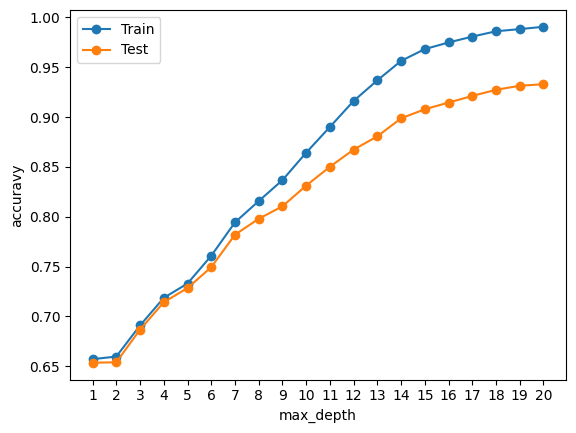

In [9]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## All features ML with the Random Forest Classifier estimator <a name="4"></a>

In [10]:
# Instantiate the estimator 
model = RandomForestClassifier(random_state=1, max_depth=11)
#  Train the model
model.fit(X_train, y_train)
# Make a prediction
prediction = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of the model with Random forest classifier algorithm is: ", accuracy)

The accuracy of the model with Random forest classifier algorithm is:  0.8522772540167308


[<a href="#content">Back to top</a>]

## Feature importance. Three methods comparison. <a name="5"></a>

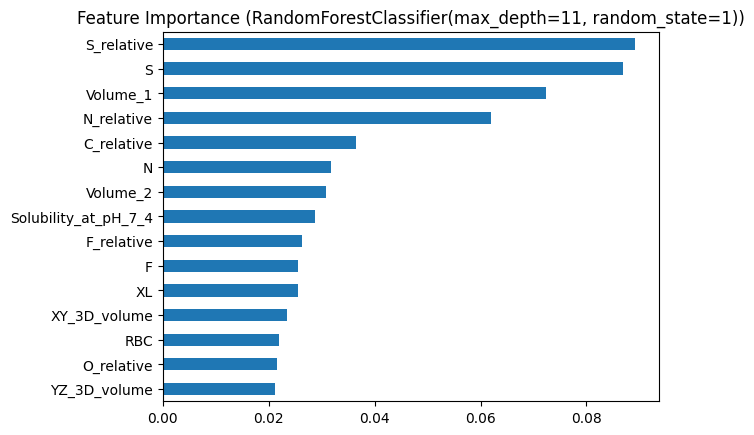

In [11]:
import matplotlib.pyplot as plt

# Define feature importance of RandomForestClassifier 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.nlargest(15).sort_values()

# Plot feature importance of RandomForestClassifier 
feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
plt.show()

Text(0.5, 0, 'Permutation Importance')

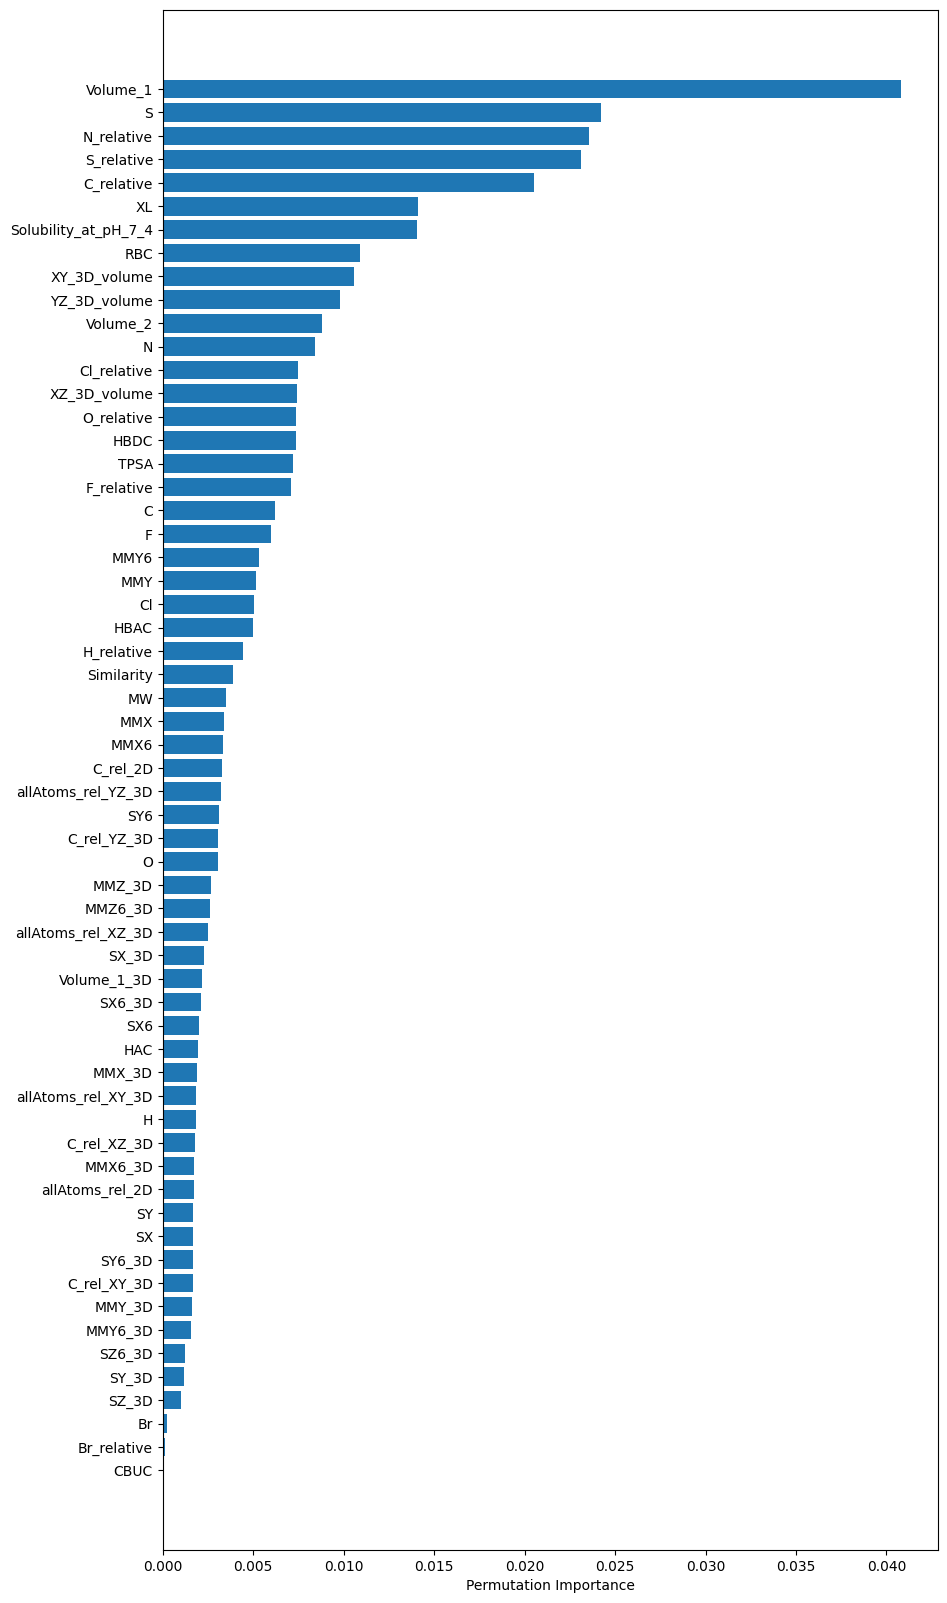

In [12]:
from sklearn.inspection import permutation_importance
import numpy as np

# Define and plot feature importance according the features` permutations
feature_names = list(X)

# Convert list into array
features = np.array(feature_names)

# Calculate the permutation importance
perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

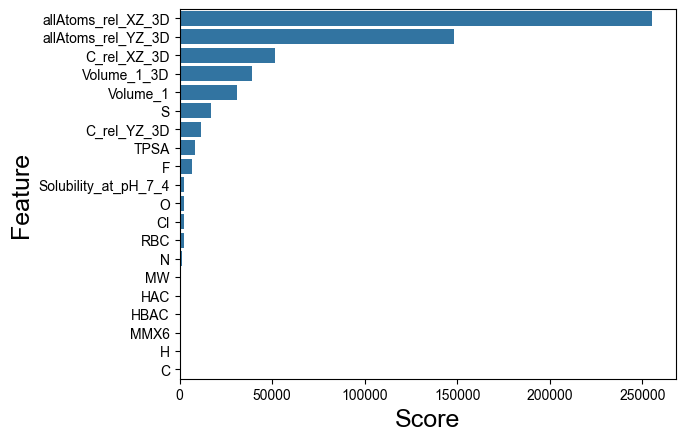

In [13]:
from sklearn.feature_selection import SelectKBest, chi2 
import seaborn as sns

# Feature selection 
sf = SelectKBest(chi2, k='all')

# Run score function on (X, y) and get the appropriate features.
sf_fit = sf.fit(X, y)

# Plot the scores
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
datset = datset.head(20) # Top 20 features 
sns.barplot(x=datset['scores'], y=datset['feature'])
sns.set_style('whitegrid')
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [14]:
## Run combination of different features based on comparison of the feature importance methods 
## Feature Importance   
# X = X[['S_relative',                  # 0.662 
#        'S',                           # 0.741
#        'Volume_1',                    # 0.783
#        'N_relative',                  # 0.858
#        'C_relative',                  # 0.909 
#        'Volume_2',                    # 0.913
#        'N',                           # 0.918
#        'F',                           # 0.916
#        'F_relative',                  # 0.922
#        'RBC',                         # 0.922
#        'Solubility_at_pH_7_4',        # 0.912
#        ]]

# Permutation feature importance
X = X[['Volume_1', 
        'S_relative',                   # 0.662
        'S',                            # 0.77
        'N_relative',                   # 0.782
        'C_relative',                   # 0.853
        # 'RBC',                          # 0.912   
        # 'XL',                           # 0.925
        # 'XY_3D_volume',                 # 0.922
        # 'YZ_3D_volume',                 # 0.921
        # 'Solubility_at_pH_7_4',         # 0.926
        # 'F'                             # 0.928
        ]]

# Feature selection based on chi2
# X = X[['allAtoms_rel_XZ_3D',              # 0.504
       # 'allAtoms_rel_YZ_3D',              # 0.536
       # 'C_rel_XZ_3D',                     # 0.595
       # 'Volume_1_3D',                     # 0.673
       # 'Volume_1',                        # 0.786
       # 'S',                               # 0.818
       # 'C_rel_YZ_3D',                     # 0.819
       # 'TPSA',                            # 0.855
       # 'F',                               # 0.86
       # 'Solubility_at_pH_7_4',            # 0.882
       # 'O',                               # 0.899
       #]]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.9112999601646528


In [15]:
# Load data regarding the comparison between different feature importance selection methods for the first 15 features
# graph = pd.read_csv('graph_feature importance.csv', index_col=[0])
graph = pd.read_csv('graph_feature importance.csv')

# Display the head of the dataset with the comparison data
graph.head()

,Number of the features,Accuracy,Methods
0,0,0.000,Method 1_Feature importance
1,1,0.662,Method 1_Feature importance
2,2,0.741,Method 1_Feature importance
3,3,0.783,Method 1_Feature importance
4,4,0.858,Method 1_Feature importance


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

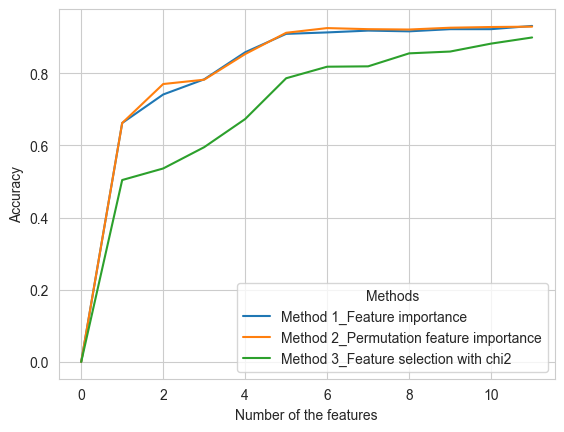

In [16]:
# Illustrate the comparison between the different feature importance selection methods for the first 15 features
sns.lineplot(x="Number of the features", y="Accuracy",
             hue="Methods",
             data=graph)
plt.xticks

In [17]:
model = RandomForestClassifier(max_depth=19, random_state=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.9033328907183641


[<a href="#content">Back to top</a>]

## Hyper-parameter tuning of the five-feature model <a name="6"></a>

In [18]:
# https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/ 
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=19)
params = {
    'n_estimators': [50, 100, 200],                  # 100
    'criterion': ['gini', 'entropy', 'log_loss'],    #'gini'
    'max_depth': [None, 2, 5, 10, 20],               # None
    'min_samples_split': [2, 10, 20, 50],            # 2
    'min_samples_leaf': [1, 2, 10, 20, 50],          # 1
    'oob_score': [False, True]                       # False
    }     

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")
# %%time
grid_search.fit(X_train, y_train)

print("grid_search.best_score_", grid_search.best_score_)

rf_best = grid_search.best_estimator_
rf_best

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
grid_search.best_score_ 0.9128544774618295


RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [19]:
# Instantiate the model with the new hyperparameters
model=RandomForestClassifier(criterion='entropy',
                            min_samples_split=10, 
                            n_estimators=200,
                            n_jobs=-1,
                            max_depth=20) 
# Thrain the model
model.fit(X_train, y_train)
# Make a prediction
predicted = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, predicted)
print("The accuracy of the model with Random Forest Classifier algorithm is: ", accuracy)

The accuracy of the model with Random Forest Classifier algorithm is:  0.903598459699907


In [20]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_auc_score
auc_ = roc_auc_score(y_test, predicted)
print("The Area Under the Curve (AUC) of the model with Random Forest Classifier algorithm is: ", auc_)

The Area Under the Curve (AUC) of the model with Random Forest Classifier algorithm is:  0.9044644485399942


[<a href="#content">Back to top</a>]

## Compariosn of the training and testing accuracy results of the five-feature model <a name="7"></a>

In [21]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 23)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.622, test: 0.618
>2, train: 0.643, test: 0.639
>3, train: 0.668, test: 0.662
>4, train: 0.706, test: 0.701
>5, train: 0.721, test: 0.715
>6, train: 0.745, test: 0.740
>7, train: 0.762, test: 0.754
>8, train: 0.789, test: 0.781
>9, train: 0.809, test: 0.801
>10, train: 0.821, test: 0.814
>11, train: 0.843, test: 0.832
>12, train: 0.861, test: 0.845
>13, train: 0.871, test: 0.853
>14, train: 0.890, test: 0.868
>15, train: 0.905, test: 0.879
>16, train: 0.913, test: 0.882
>17, train: 0.932, test: 0.895
>18, train: 0.937, test: 0.897
>19, train: 0.945, test: 0.903
>20, train: 0.954, test: 0.906
>21, train: 0.956, test: 0.906
>22, train: 0.962, test: 0.909


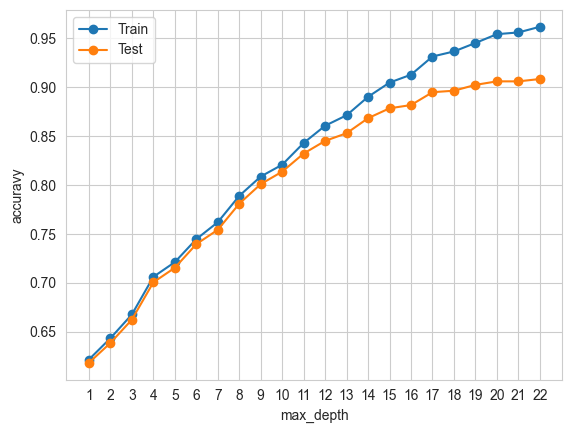

In [22]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix and classification report of the five-feature model  <a name="8"></a>

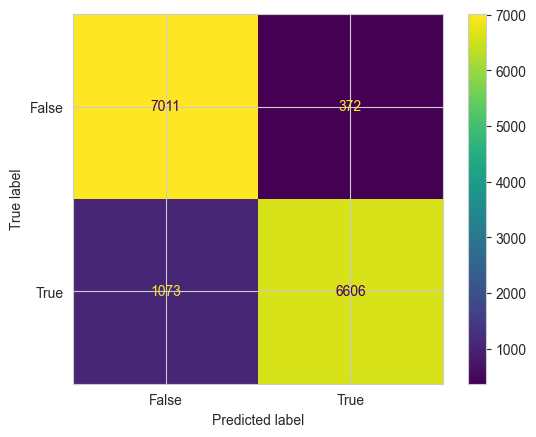

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = RandomForestClassifier(criterion='entropy',
                            min_samples_split=10, 
                            n_estimators=200,
                            n_jobs=-1,
                            max_depth=20,
                            random_state=42).fit(X_train,y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active-inhibitor (target 1) ', 'Other-than-active-inhibitor (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                                        precision    recall  f1-score   support

          Active-inhibitor (target 1)        0.87      0.95      0.91      7383
Other-than-active-inhibitor (target 0)       0.95      0.86      0.90      7679

                              accuracy                           0.90     15062
                             macro avg       0.91      0.90      0.90     15062
                          weighted avg       0.91      0.90      0.90     15062



[<a href="#content">Back to top</a>]

## Printing the real and the predicted values<a name="9"></a>

In [25]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

In [26]:
# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(predicted.tolist(),columns=["Predicted Values"])

In [27]:
# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Display the resulted data frame 
final_output

,Real Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
15057,0,0
15058,1,1
15059,1,1
15060,0,0


[<a href="#content">Back to top</a>]

## Neural Network tuned with the  hyperparameter optimization framework Optuna <a name="10"></a>

In [28]:
import torch

# Convert data into tenzors
X_train = torch.Tensor(X_train).float()
y_train = torch.Tensor(y_train).float().reshape(-1, 1)

X_test = torch.Tensor(X_test).float()
y_test = torch.Tensor(y_test.to_numpy()).float().reshape(-1, 1) # convert Series to an array with to_numpy()

In [29]:
import os

# Define variables
DEVICE = torch.device("cpu")
BATCHSIZE = 5
TARGETS = 2
DIR = os.getcwd()
EPOCHS = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 30
N_VALID_EXAMPLES = BATCHSIZE * 10

In [30]:
# Function to ptimize the number of layers, hidden units and dropout ratio in each layer.
def define_model(trial):
    n_layers = trial.suggest_int("n_layers", 1, 3)  # name, low, high,
    layers = []

    in_features = X.shape[1]
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, TARGETS))
    layers.append(nn.LogSoftmax(dim=1))

    return nn.Sequential(*layers)

In [31]:
from torch.utils.data import DataLoader, TensorDataset

# Instantiate the tensor datasets 
dataset_train = TensorDataset(X_train, y_train)
dataset_test = TensorDataset(X_test, y_test)

In [32]:
import optuna
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from optuna.trial import TrialState

# Do tuning
def objective(trial):
    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Get the dataset.
    train_loader = DataLoader(dataset_train, 
                              batch_size=BATCHSIZE,
                              shuffle=True)
    valid_loader = DataLoader(dataset_test, 
                              batch_size=BATCHSIZE,
                              shuffle=True)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.mse_loss(output, target)   # https://pytorch.org/docs/stable/nn.functional.html
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(valid_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-06-20 03:41:44,524] A new study created in memory with name: no-name-6679616d-2dee-47ce-8891-4bae04334a19
C:\Users\ivano\AppData\Local\Temp\ipykernel_18840\730275161.py:37: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, target)   # https://pytorch.org/docs/stable/nn.functional.html
[I 2024-06-20 03:41:46,199] Trial 0 finished with value: 0.48 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'dropout_l0': 0.2812906795576669, 'n_units_l1': 41, 'dropout_l1': 0.28829797706957094, 'optimizer': 'Adam', 'lr': 0.0037487

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  84
  Number of complete trials:  16
Best trial:
  Value:  0.6
  Params: 
    n_layers: 2
    n_units_l0: 109
    dropout_l0: 0.34689134908639596
    n_units_l1: 8
    dropout_l1: 0.4972208057797921
    optimizer: RMSprop
    lr: 0.03217823774332842


[<a href="#content">Back to top</a>]